In [98]:
import numpy as np
import matplotlib.pyplot as plt

In [99]:
class TwoLayers():
    
    def __init__(self, input_dim, output_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        
        self.theta = np.random.randn(input_dim, output_dim) / np.sqrt(input_dim)       
        self.bias = np.zeros((1, output_dim))
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z = np.dot(X,self.theta) + self.bias
        exp_z = np.exp(z)
        softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    #--------------------------------------------------------------------------
   
    def fit(self,X,y,num_epochs,lr=0.01):
        for epoch in range(0, num_epochs):

            # Forward propagation
            z = np.dot(X,self.theta) + self.bias
            exp_z = np.exp(z)
            softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
        
            # Backpropagation
            beta = np.zeros_like(softmax_scores)
            one_hot_y = np.zeros_like(softmax_scores)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            beta = softmax_scores - one_hot_y
    
            # Compute gradients of model parameters
            dtheta = np.dot(X.T,beta)
            dbias = np.sum(beta, axis=0)
    
            # Gradient descent parameter update
            self.theta -= lr * dtheta
            self.bias -= lr * dbias
            
        return 0


In [100]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

In [101]:
def tanh(z):
    return np.tanh(z)
def dtanh(z):
    return 1 - np.tanh(z)**2

In [249]:
class ThreeLayers():
    """
    This lab implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, output_dim, hidden_dim):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
        """
        
        self.theta = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)       
        self.bias = np.zeros((1, hidden_dim))
        
        self.theta2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)       
        self.bias2 = np.zeros((1, output_dim))
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z = np.dot(X,self.theta) + self.bias
        a2 = tanh(z)

        z2 = np.dot(a2,self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        a3 = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))  
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(a3[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        return (1./num_examples * data_loss) + (.1/2)*(np.sum(self.theta)+np.sum(self.theta2))

    
    #--------------------------------------------------------------------------
    
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z = np.dot(X,self.theta) + self.bias
        a2 = tanh(z)
        z2 = np.dot(a2,self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        a3 = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        
        predictions = np.argmax(a3, axis = 1)
        return predictions
        
   
    def fit(self,X,y,num_epochs,lr=0.01):
        for epoch in range(0, num_epochs):

            # Forward propagation
            z = np.dot(X,self.theta) + self.bias
            a2 = tanh(z)

            z2 = np.dot(a2,self.theta2) + self.bias2
            exp_z2 = np.exp(z2)
            a3 = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        
            # Backpropagation
            beta = np.zeros_like(a3)
            one_hot_y = np.zeros_like(a3)
            for i in range(X.shape[0]):
                one_hot_y[i,y[i]] = 1
            beta = a3 - one_hot_y
            
            dtanh2 = dtanh(a3)
            doutput = beta * dtanh2
            beta2 = beta.dot(self.theta2.T)
            
            dtanh1 = dtanh(a2)
            dhidden = beta2 * dtanh1
            
            # Compute gradients of model parameters
            dtheta = np.dot(X.T,dhidden)
            dbias = np.sum(dhidden, axis=0)
            
            dtheta2 = np.dot(a2.T,doutput)
            dbias2 = np.sum(doutput, axis=0)
    
            # Gradient descent parameter update
            self.theta -= lr * dtheta
            self.bias -= lr * dbias
            
            self.theta2 -= lr * dtheta2
            self.bias2 -= lr * dbias2
            
        return 0
    
    
    

# 1

In [103]:
#Load data
X = np.genfromtxt('DATA/LinearX.csv', delimiter=',')
y = np.genfromtxt('DATA/Lineary.csv', delimiter=',').astype(np.int64)

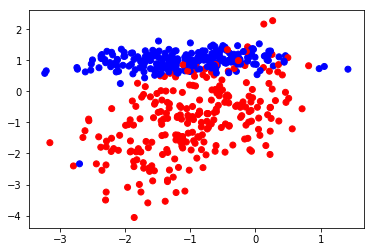

In [104]:
#Plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [105]:
#Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = TwoLayers(input_dim, output_dim)

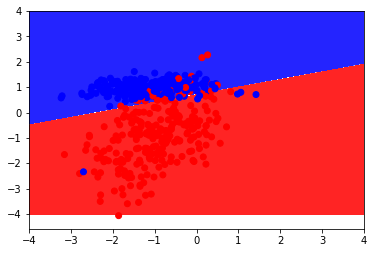

In [106]:
#Train the model, plot decision boundary after trainning
logreg.fit(X,y,1000,lr=0.001)
plot_decision_boundary(logreg, X, y)

In [107]:
#compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.93
CONFUSION MATRIX: 
 [[ 244.   29.]
 [   6.  221.]]


In [108]:
#compute cost
cost = logreg.compute_cost(X,y)
print (cost)

0.207171651235


# 2

In [109]:
#Load data
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',')
y = np.genfromtxt('DATA/Nonlineary.csv', delimiter=',').astype(np.int64)

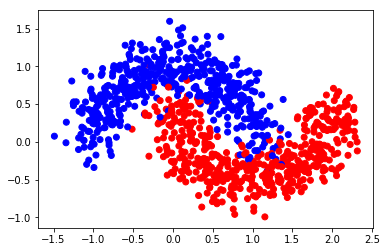

In [110]:
#Plot data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [111]:
#Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = TwoLayers(input_dim, output_dim)

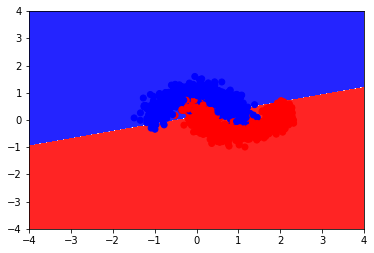

In [112]:
#Train the model, plot decision boundary after trainning
logreg.fit(X,y,1000,lr=0.001)
plot_decision_boundary(logreg, X, y)

In [113]:
#compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.875
CONFUSION MATRIX: 
 [[ 437.   62.]
 [  63.  438.]]


In [114]:
#compute cost
cost = logreg.compute_cost(X,y)
print (cost)

0.290882470401


# 3

In [115]:
#Load data
X = np.genfromtxt('DATA/LinearX.csv', delimiter=',')
y = np.genfromtxt('DATA/Lineary.csv', delimiter=',').astype(np.int64)

In [118]:
#Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = np.shape(X)[0]
logreg = ThreeLayers(input_dim, output_dim, hidden_dim)

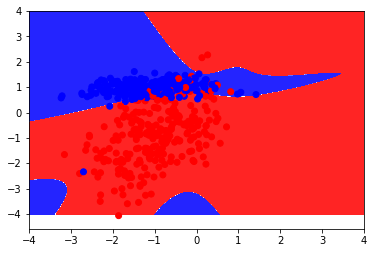

In [119]:
#Train the model, plot decision boundary after trainning
logreg.fit(X,y,1000,lr=0.001)
plot_decision_boundary(logreg, X, y)

In [120]:
#compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.948
CONFUSION MATRIX: 
 [[ 239.   15.]
 [  11.  235.]]


In [121]:
#compute cost
cost = logreg.compute_cost(X,y)
print (cost)

0.140873597109


In [122]:
#Load data
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',')
y = np.genfromtxt('DATA/Nonlineary.csv', delimiter=',').astype(np.int64)

In [123]:
#Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = np.shape(X)[0]
logreg = ThreeLayers(input_dim, output_dim, hidden_dim)

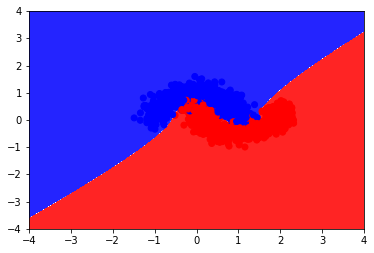

In [124]:
#Train the model, plot decision boundary after trainning
logreg.fit(X,y,1000,lr=0.001)
plot_decision_boundary(logreg, X, y)

In [125]:
#compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.964
CONFUSION MATRIX: 
 [[ 485.   21.]
 [  15.  479.]]


In [126]:
#compute cost
cost = logreg.compute_cost(X,y)
print (cost)

0.0910448327903


# 4 
##Use linear data with 2 layers.

In [161]:
X = np.genfromtxt('DATA/LinearX.csv', delimiter=',')
y = np.genfromtxt('DATA/Lineary.csv', delimiter=',').astype(np.int64)

input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = TwoLayers(input_dim, output_dim)

In [162]:
#compute accuracy
def accuracy(lr):
    logreg.fit(X,y,1000,lr)
    acc = 0
    y_pred = logreg.predict(X)
    for i in range(len(y_pred)):
        if y[i] == y_pred[i]:
            acc += 1
    acc = acc/len(y_pred)
    print('Learning Rate ', lr)
    print ('ACCURACY: ', acc)


In [154]:
accuracy(.5)

Learning Rate  0.5
ACCURACY:  0.86


In [160]:
accuracy(.1)

Learning Rate  0.1
ACCURACY:  0.868


In [139]:
accuracy(.01)

Learning Rate  0.01
ACCURACY:  0.93


In [166]:
accuracy(.000001)

Learning Rate  1e-06
ACCURACY:  0.93


# 5

In [230]:
#Load data
X = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',')
y = np.genfromtxt('DATA/Nonlineary.csv', delimiter=',').astype(np.int64)

In [231]:
#Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = np.shape(X)[0]

In [257]:
#Train the model, plot decision boundary after trainning
logreg = ThreeLayers(input_dim, output_dim, 100)
logreg.fit(X,y,1000,lr=0.001)


0

In [220]:
#compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  0.968
CONFUSION MATRIX: 
 [[ 488.   20.]
 [  12.  480.]]


In [221]:
#compute cost
cost = logreg.compute_cost(X,y)
print (cost)

0.0860942839058


# 8

In [258]:
#Load data
X = np.genfromtxt('DATA/Digit_X_train.csv', delimiter=',')
y = np.genfromtxt('DATA/Digit_y_train.csv', delimiter=',').astype(np.int64)

In [259]:
#Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
hidden_dim = np.shape(X)[0]

In [263]:
logreg = ThreeLayers(input_dim, output_dim, hidden_dim)
logreg.fit(X,y,1000,lr=0.001)

0

In [265]:
#compute accuracy and confusion matrix
acc = 0
y_pred = logreg.predict(X)
con_mat = np.zeros((output_dim, output_dim))
for i in range(len(y_pred)):
    con_mat[y_pred[i], y[i]] += 1
    if y[i] == y_pred[i]:
        acc += 1
acc = acc/len(y_pred)
print ('ACCURACY: ', acc)
print ('CONFUSION MATRIX: \n', con_mat)

ACCURACY:  1.0
CONFUSION MATRIX: 
 [[ 90.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.  91.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  91.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  92.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  89.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  91.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  90.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  90.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  86.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.  88.]]


In [266]:
#compute cost
cost = logreg.compute_cost(X,y)
print (cost)

0.0255511236471


In [271]:
import numpy as np
from PIL import Image 

for i in range(10):
    data = np.reshape(255*X[i],(8,8)) #i--the ith digit
    image = Image.fromarray(data)
    image.show()